In [373]:
#pip install yfinance
import talib as ta
import pandas as pd
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt 
#Yahoo Finance Library
import yfinance as yf
import numpy as np

In [6]:
# Datetime conversion
#df['Date'] = pd.to_datetime(df.Date)
# Setting the index
#df.set_index('Date', inplace=True)

In [13]:
#Functions available
ta.get_function_groups()

{'Cycle Indicators': ['HT_DCPERIOD',
  'HT_DCPHASE',
  'HT_PHASOR',
  'HT_SINE',
  'HT_TRENDMODE'],
 'Math Operators': ['ADD',
  'DIV',
  'MAX',
  'MAXINDEX',
  'MIN',
  'MININDEX',
  'MINMAX',
  'MINMAXINDEX',
  'MULT',
  'SUB',
  'SUM'],
 'Math Transform': ['ACOS',
  'ASIN',
  'ATAN',
  'CEIL',
  'COS',
  'COSH',
  'EXP',
  'FLOOR',
  'LN',
  'LOG10',
  'SIN',
  'SINH',
  'SQRT',
  'TAN',
  'TANH'],
 'Momentum Indicators': ['ADX',
  'ADXR',
  'APO',
  'AROON',
  'AROONOSC',
  'BOP',
  'CCI',
  'CMO',
  'DX',
  'MACD',
  'MACDEXT',
  'MACDFIX',
  'MFI',
  'MINUS_DI',
  'MINUS_DM',
  'MOM',
  'PLUS_DI',
  'PLUS_DM',
  'PPO',
  'ROC',
  'ROCP',
  'ROCR',
  'ROCR100',
  'RSI',
  'STOCH',
  'STOCHF',
  'STOCHRSI',
  'TRIX',
  'ULTOSC',
  'WILLR'],
 'Overlap Studies': ['BBANDS',
  'DEMA',
  'EMA',
  'HT_TRENDLINE',
  'KAMA',
  'MA',
  'MAMA',
  'MAVP',
  'MIDPOINT',
  'MIDPRICE',
  'SAR',
  'SAREXT',
  'SMA',
  'T3',
  'TEMA',
  'TRIMA',
  'WMA'],
 'Pattern Recognition': ['CDL2CROWS',
  'C

In [14]:
#Functions available
talib.get_function_groups()

{'Cycle Indicators': ['HT_DCPERIOD',
  'HT_DCPHASE',
  'HT_PHASOR',
  'HT_SINE',
  'HT_TRENDMODE'],
 'Math Operators': ['ADD',
  'DIV',
  'MAX',
  'MAXINDEX',
  'MIN',
  'MININDEX',
  'MINMAX',
  'MINMAXINDEX',
  'MULT',
  'SUB',
  'SUM'],
 'Math Transform': ['ACOS',
  'ASIN',
  'ATAN',
  'CEIL',
  'COS',
  'COSH',
  'EXP',
  'FLOOR',
  'LN',
  'LOG10',
  'SIN',
  'SINH',
  'SQRT',
  'TAN',
  'TANH'],
 'Momentum Indicators': ['ADX',
  'ADXR',
  'APO',
  'AROON',
  'AROONOSC',
  'BOP',
  'CCI',
  'CMO',
  'DX',
  'MACD',
  'MACDEXT',
  'MACDFIX',
  'MFI',
  'MINUS_DI',
  'MINUS_DM',
  'MOM',
  'PLUS_DI',
  'PLUS_DM',
  'PPO',
  'ROC',
  'ROCP',
  'ROCR',
  'ROCR100',
  'RSI',
  'STOCH',
  'STOCHF',
  'STOCHRSI',
  'TRIX',
  'ULTOSC',
  'WILLR'],
 'Overlap Studies': ['BBANDS',
  'DEMA',
  'EMA',
  'HT_TRENDLINE',
  'KAMA',
  'MA',
  'MAMA',
  'MAVP',
  'MIDPOINT',
  'MIDPRICE',
  'SAR',
  'SAREXT',
  'SMA',
  'T3',
  'TEMA',
  'TRIMA',
  'WMA'],
 'Pattern Recognition': ['CDL2CROWS',
  'C

In [333]:
#Download data from Yahoo Finance
data=yf.download('BTC-USD', start='2017-09-28', end='2021-07-01')

[*********************100%***********************]  1 of 1 completed


In [334]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-09-28,4197.129883,4279.310059,4109.700195,4174.729980,4174.729980,1712320000
2017-09-29,4171.620117,4214.629883,4039.290039,4163.069824,4163.069824,1367049984
2017-09-30,4166.109863,4358.430176,4160.859863,4338.709961,4338.709961,1207449984
2017-10-01,4341.049805,4403.740234,4269.810059,4403.740234,4403.740234,1208210048
2017-10-02,4395.810059,4470.229980,4377.459961,4409.319824,4409.319824,1431730048


In [335]:
# Momentum Indicator Functions
data['AROONOSC']=ta.AROONOSC(data['High'],data['Low'],timeperiod=6)
data['RSI'] = ta.RSI(data['Close'],timeperiod=6)
data['RSI1'] = ta.RSI(data['Close'],timeperiod=7)
data['DX']=ta.DX(data['High'],data['Low'],data['Close'],timeperiod=2)

In [336]:
# Volume Indicator Functions
data['AD']=ta.AD(data['High'],data['Low'],data['Close'],data['Volume'])
data['OBV']=ta.OBV(data['Close'],data['Volume'])

In [337]:
# Volatility  Indicator Functions
data['ATR']=ta.ATR(data['High'],data['Low'],data['Close'],timeperiod=6)
data['NATR']=ta.NATR(data['High'],data['Low'],data['Close'],timeperiod=14)
data['TRANGE']=ta.ATR(data['High'],data['Low'],data['Close'])

In [338]:
# Pattern Recognition Functions
data['CDLENGULFING']=ta.CDLENGULFING(data['Open'],data['High'],data['Low'],data['Close'])/100
data['CDLHANGINGMAN']=ta.CDLHANGINGMAN(data['Open'],data['High'],data['Low'],data['Close'])/100
data['CDLSHOOTINGSTAR']=ta.CDLSHOOTINGSTAR(data['Open'],data['High'],data['Low'],data['Close'])/100
data['CDLHAMMER']=ta.CDLHAMMER(data['Open'],data['High'],data['Low'],data['Close'])/100

In [339]:
data.tail(50)

,Open,High,Low,Close,Adj Close,Volume,AROONOSC,RSI,RSI1,DX,AD,OBV,ATR,NATR,TRANGE,CDLENGULFING,CDLHANGINGMAN,CDLSHOOTINGSTAR,CDLHAMMER
Date,,,,,,,,,,,,,,,,,,,
2021-05-13,49735.433594,51330.843750,46980.019531,49716.191406,49716.191406,96721152926,-50.000000,28.640277,30.844380,98.542527,3.650222e+12,1.911201e+12,4218.028908,7.370349,3664.256977,0.0,0.0,0.0,0.0
2021-05-14,49682.980469,51438.117188,48868.578125,49880.535156,49880.535156,55737497453,-50.000000,29.679950,31.708596,90.786264,3.638387e+12,1.966939e+12,3943.280601,7.189303,3586.062841,1.0,0.0,0.0,0.0
2021-05-15,49855.496094,50639.664062,46664.140625,46760.187500,46760.187500,59161047474,-83.333333,22.283056,24.834114,96.463858,3.582084e+12,1.907778e+12,3948.654407,7.728544,3613.881455,0.0,0.0,0.0,0.0
2021-05-16,46716.636719,49720.042969,43963.351562,46456.058594,46456.058594,64047871555,-100.000000,21.651926,24.236616,98.591129,3.573503e+12,1.843730e+12,4249.993907,8.108607,3766.939308,0.0,0.0,0.0,0.0
2021-05-17,46415.898438,46623.558594,42207.289062,43537.511719,43537.511719,74903638450,-83.333333,16.326750,19.093475,99.209520,3.543723e+12,1.768826e+12,4277.706511,8.758700,3813.320039,0.0,0.0,0.0,0.0
2021-05-18,43488.058594,45812.457031,42367.832031,42909.402344,42909.402344,56187365084,-83.333333,15.351664,18.127618,99.209520,3.505204e+12,1.712639e+12,4138.859592,8.825536,3786.984679,0.0,0.0,0.0,0.0
2021-05-19,42944.976562,43546.117188,30681.496094,37002.441406,37002.441406,126358098747,-83.333333,9.170706,11.657533,99.937679,3.503016e+12,1.586281e+12,5593.153176,11.986742,4435.387280,0.0,0.0,0.0,0.0
2021-05-20,36753.667969,42462.984375,35050.617188,40782.738281,40782.738281,88281943359,-83.333333,30.622441,30.246114,99.937679,3.551274e+12,1.674563e+12,5896.355511,11.397049,4648.028702,0.0,0.0,0.0,0.0
2021-05-21,40596.949219,42172.171875,33616.453125,37304.691406,37304.691406,82051616861,-66.666667,24.289033,24.673449,99.957085,3.539965e+12,1.592511e+12,6339.582718,13.207855,4927.149420,0.0,0.0,0.0,0.0


In [340]:
data_lagged.to_csv('xxxx')

In [341]:
#data1 = data[['Close','AROONOSC','RSI','RSI1','DX','ADOSC','OBV','ATR','TRANGE','CDLENGULFING','CDLHANGINGMAN','CDLSHOOTINGSTAR','CDLHAMMER']]
#data1

In [342]:
#create Lagged series 
data_lagged = data.copy() 
trailing_window_size = 1
for window in range(1, trailing_window_size +1): 
    shifted= data.shift(window) 
    shifted.columns = [x + "_lag" + str(window) for x in data.columns] 
    data_lagged = pd.concat((data_lagged, shifted), axis=1) 
data_lagged = data_lagged.dropna()
data_lagged.head()

,Open,High,Low,Close,Adj Close,Volume,AROONOSC,RSI,RSI1,DX,...,DX_lag1,AD_lag1,OBV_lag1,ATR_lag1,NATR_lag1,TRANGE_lag1,CDLENGULFING_lag1,CDLHANGINGMAN_lag1,CDLSHOOTINGSTAR_lag1,CDLHAMMER_lag1
Date,,,,,,,,,,,,,,,,,,,,,
2017-10-13,5464.160156,5840.299805,5436.850098,5647.209961,5647.209961,3615480064,100.000000,96.443426,95.086632,98.942339,...,97.635023,5.757130e+09,1.382015e+10,245.291755,3.627589,197.591518,0.0,0.0,0.0,0.0
2017-10-14,5643.529785,5837.700195,5591.640137,5831.790039,5831.790039,1669030016,83.333333,97.065831,95.869436,98.942339,...,98.942339,5.911893e+09,1.743563e+10,271.651413,3.759302,212.295674,0.0,0.0,0.0,0.0
2017-10-15,5835.959961,5852.479980,5478.609863,5678.189941,5678.189941,1976039936,100.000000,82.626459,83.027013,21.654208,...,98.942339,7.500746e+09,1.910466e+10,267.386188,3.681673,214.707416,0.0,0.0,0.0,0.0
2017-10-16,5687.569824,5776.229980,5544.209961,5725.589844,5725.589844,2008070016,66.666667,83.533546,83.807925,21.654208,...,21.654208,7.634413e+09,1.712862e+10,285.133509,3.981483,226.076180,0.0,0.0,0.0,0.0
2017-10-17,5741.580078,5800.350098,5472.720215,5605.509766,5605.509766,1821570048,66.666667,72.091136,73.775696,38.647305,...,21.654208,8.765930e+09,1.913669e+10,276.281261,3.955937,226.500740,0.0,0.0,0.0,0.0


In [343]:
#Save to CSV
data_lagged.to_csv('BTC_TECH_ANALYSIS')

In [344]:
#Scale Data
sc_x = StandardScaler() 
data_scaled = pd.DataFrame(sc_x.fit_transform(data_lagged), index=data_lagged.index, columns=data_lagged.columns)
data_scaled


,Open,High,Low,Close,Adj Close,Volume,AROONOSC,RSI,RSI1,DX,...,DX_lag1,AD_lag1,OBV_lag1,ATR_lag1,NATR_lag1,TRANGE_lag1,CDLENGULFING_lag1,CDLHANGINGMAN_lag1,CDLSHOOTINGSTAR_lag1,CDLHAMMER_lag1
Date,,,,,,,,,,,,,,,,,,,,,
2017-10-13,-0.609634,-0.591848,-0.602712,-0.597295,-0.597295,-0.903280,1.344000,2.152534,2.210766,1.053318,...,1.009059,-0.898040,-0.981391,-0.540105,-0.561928,-0.596830,-0.03621,0.139923,0.102214,-0.191712
2017-10-14,-0.596448,-0.592033,-0.590864,-0.583732,-0.583732,-0.992313,1.100128,2.183420,2.251933,1.053318,...,1.051837,-0.897897,-0.975774,-0.515933,-0.513524,-0.582666,-0.03621,0.139923,0.102214,-0.191712
2017-10-15,-0.582302,-0.590981,-0.599516,-0.595019,-0.595019,-0.978270,1.344000,1.466882,1.576556,-1.476036,...,1.051837,-0.896427,-0.973181,-0.519844,-0.542052,-0.580343,-0.03621,0.139923,0.102214,-0.191712
2017-10-16,-0.593211,-0.596409,-0.594494,-0.591536,-0.591536,-0.976805,0.856255,1.511895,1.617624,-1.476036,...,-1.477130,-0.896304,-0.976251,-0.503570,-0.431875,-0.569392,-0.03621,0.139923,0.102214,-0.191712
2017-10-17,-0.589240,-0.594692,-0.599966,-0.600359,-0.600359,-0.985336,0.856255,0.944077,1.090034,-0.919915,...,-1.477130,-0.895257,-0.973132,-0.511687,-0.441263,-0.568983,-0.03621,0.139923,0.102214,-0.191712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-27,1.362215,1.459533,1.436051,1.533786,1.533786,0.555688,-0.363107,-0.024266,-0.113962,-0.932682,...,0.203305,2.474611,1.452649,2.062262,1.687311,2.235086,-0.03621,0.139923,0.102214,-0.191712
2021-06-28,1.538027,1.499667,1.576152,1.517965,1.517965,0.481628,0.612383,-0.092485,-0.173316,-0.398645,...,-0.933859,2.507289,1.507815,1.986025,1.390722,2.197025,-0.03621,0.139923,0.102214,-0.191712
2021-06-29,1.523063,1.593795,1.602974,1.623294,1.623294,0.665001,0.612383,0.325933,0.215042,0.424200,...,-0.399904,2.501265,1.455164,1.728921,1.275560,2.074539,-0.03621,0.139923,0.102214,-0.191712


In [345]:
#Split the Data
from sklearn.model_selection import train_test_split 
y = data_scaled[['Close']]
X = data_scaled[['AROONOSC_lag1','RSI_lag1','RSI1_lag1','DX_lag1','AD_lag1','OBV_lag1','ATR_lag1','NATR_lag1','TRANGE_lag1','CDLENGULFING_lag1','CDLHANGINGMAN_lag1','CDLSHOOTINGSTAR_lag1','CDLHAMMER_lag1']]

In [346]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [347]:
 X_train

,AROONOSC_lag1,RSI_lag1,RSI1_lag1,DX_lag1,AD_lag1,OBV_lag1,ATR_lag1,NATR_lag1,TRANGE_lag1,CDLENGULFING_lag1,CDLHANGINGMAN_lag1,CDLSHOOTINGSTAR_lag1,CDLHAMMER_lag1
Date,,,,,,,,,,,,,
2019-09-18,0.124032,-0.504746,-0.436527,0.417492,-0.220052,0.001868,-0.572232,-0.816035,-0.497514,-0.036210,0.139923,0.102214,-0.191712
2019-10-27,0.367776,1.134018,1.086784,0.794031,-0.243247,-0.120158,-0.247161,-0.317077,-0.404782,-0.036210,0.139923,0.102214,-0.191712
2020-01-04,-1.338430,0.192498,0.142503,-1.488416,-0.398454,-0.345656,-0.536769,-0.648405,-0.547158,2.847822,0.139923,0.102214,-0.191712
2019-03-24,-0.119712,0.269184,0.333227,-0.246459,-0.717522,-0.666176,-0.711725,-1.258040,-0.719775,2.847822,0.139923,0.102214,-0.191712
2018-09-22,0.367776,0.818858,0.677835,0.818384,-0.689246,-0.740775,-0.589657,-0.788952,-0.591899,-0.036210,0.139923,0.102214,-0.191712
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-16,1.342751,1.461509,1.389224,1.030486,0.599437,0.725280,-0.534006,-1.029821,-0.526462,-0.036210,0.139923,0.102214,-0.191712
2020-11-20,0.855263,1.628091,1.662125,1.007904,0.935422,1.353267,-0.034817,-0.457299,-0.115719,-0.036210,0.139923,0.102214,-0.191712
2021-05-03,1.099007,0.205502,0.148444,-2.183828,2.484262,1.870100,1.899260,0.085972,2.153415,-0.036210,0.139923,0.102214,-0.191712


In [348]:
# ElasticNet regression
from sklearn.linear_model import ElasticNet

In [355]:
model = ElasticNet(alpha=0.02, l1_ratio=0.4,normalize=False)
model.fit(X, y)

ElasticNet(alpha=0.02, l1_ratio=0.4)

In [356]:
coef = list(model.coef_)

In [357]:
count = 0
for i in X.columns:
    print(i,':',coef[count])
    count+= 1

AROONOSC_lag1 : 0.005689963274143037
RSI_lag1 : 0.0018266467412396182
RSI1_lag1 : 0.020185556587702293
DX_lag1 : 0.0
AD_lag1 : 0.04129086705255655
OBV_lag1 : 0.2922546362137586
ATR_lag1 : 0.0
NATR_lag1 : -0.1449160362122981
TRANGE_lag1 : 0.7239321853958428
CDLENGULFING_lag1 : -0.002288429036711019
CDLHANGINGMAN_lag1 : 0.0
CDLSHOOTINGSTAR_lag1 : -0.0
CDLHAMMER_lag1 : -0.0


In [358]:
#Forecast Values of BTC
BTC_fitted= X.dot(coef)
BTC_fitted.tail()

Date
2021-06-27    1.878128
2021-06-28    1.928784
2021-06-29    1.845393
2021-06-30    1.863439
2021-07-01    1.795290
dtype: float64

In [359]:
BTC_actual=data_scaled[['Close']]
BTC_actual.tail()

,Close
Date,
2021-06-27,1.533786
2021-06-28,1.517965
2021-06-29,1.623294
2021-06-30,1.562531
2021-07-01,1.454610


Text(0.5, 0, 'DATE')

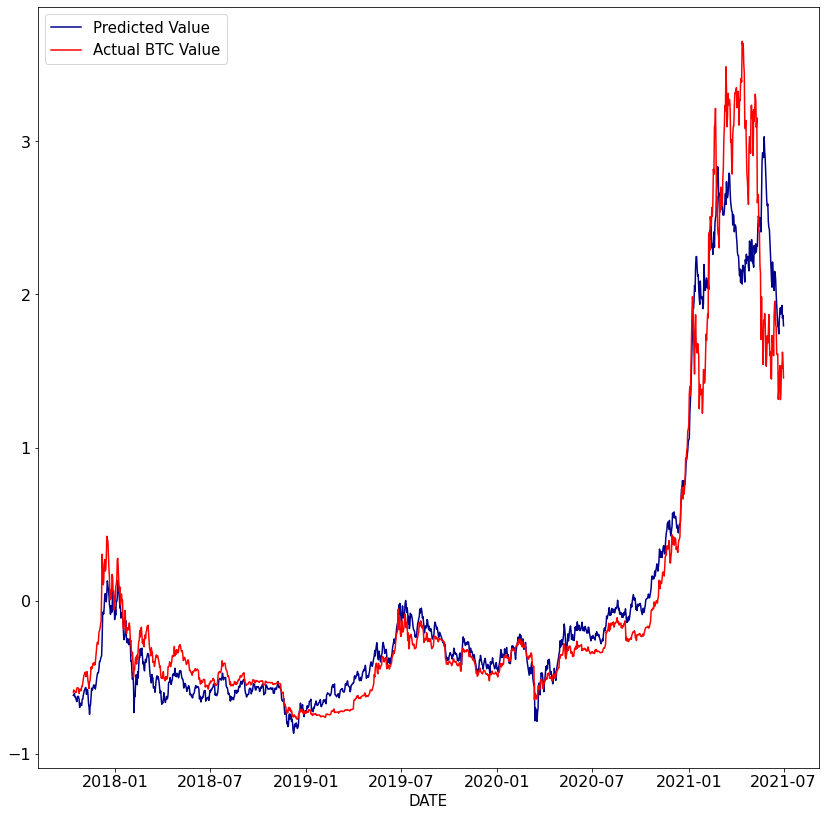

In [398]:
plt.figure(figsize=(14, 14))
plt.plot(data_scaled.index, BTC_fitted, c='darkblue',label='Predicted Value')
plt.plot(data_scaled.index, BTC_actual, c='red',label='Actual BTC Value')
plt.legend(prop=dict(size=15))
plt.xlabel('DATE', fontsize=15)


In [367]:
y=BTC_actual
X=BTC_fitted

In [368]:
y

,Close
Date,
2017-10-13,-0.597295
2017-10-14,-0.583732
2017-10-15,-0.595019
2017-10-16,-0.591536
2017-10-17,-0.600359
...,...
2021-06-27,1.533786
2021-06-28,1.517965
2021-06-29,1.623294


In [369]:
y=y.values.reshape(-1,1)
X=X.values.reshape(-1,1)

In [370]:
y

array([[-0.5972952 ],
       [-0.58373237],
       [-0.59501881],
       ...,
       [ 1.6232939 ],
       [ 1.56253074],
       [ 1.45461017]])

In [379]:
#Mean Squared Error
SR= np.square(X-y)
MSE= np.sum(SR)/len(data)
MSE

0.07061104570192507